---
## Step 0: Load The Data

In [1]:
import os
import pickle
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf

os.chdir('.')
base_path = os.path.abspath('.')
data_dir = os.path.join(base_path, 'traffic-signs-data')

training_file = os.path.join(data_dir, 'train.p')
validation_file= os.path.join(data_dir, 'valid.p')
testing_file = os.path.join(data_dir, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

y_train = y_train.astype('int32')
y_valid = y_valid.astype('int32')
y_test = y_test.astype('int32')

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

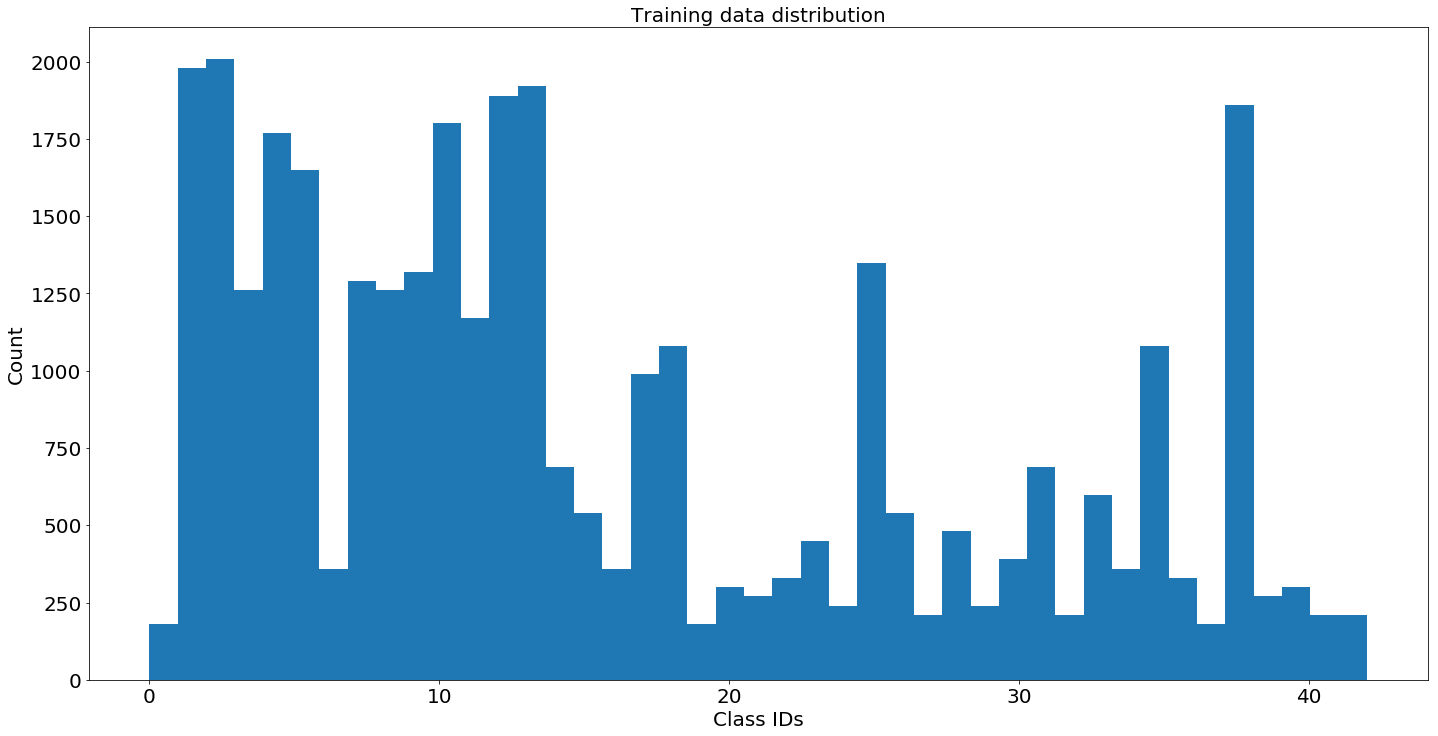

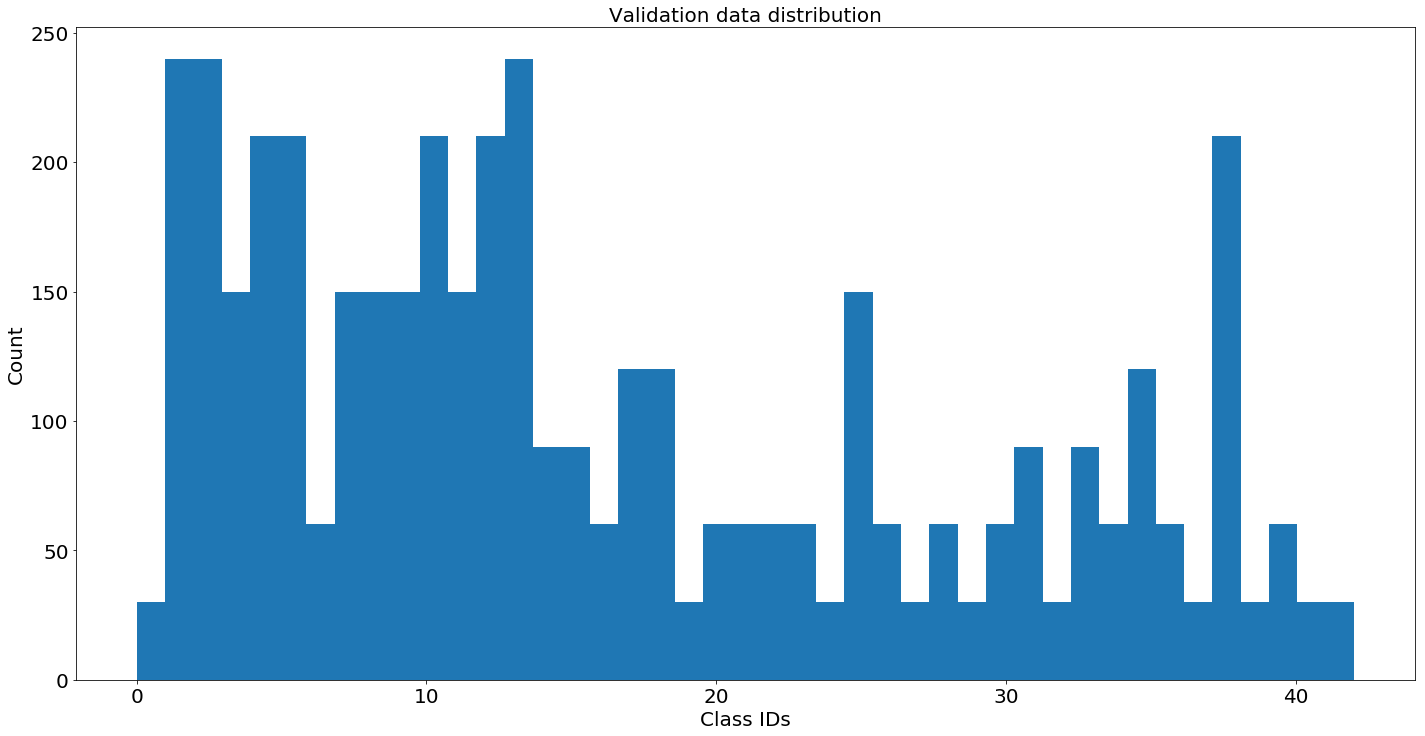

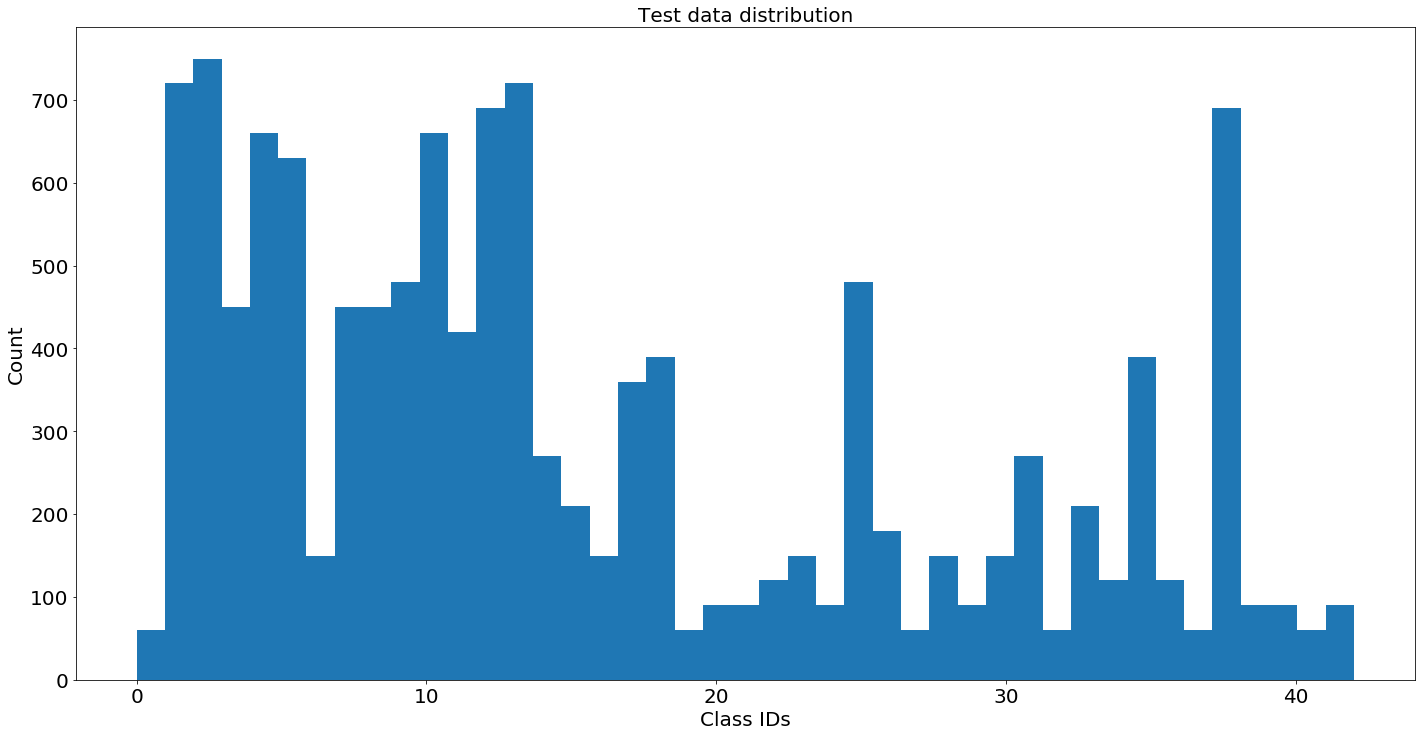

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
sign_info = pd.read_csv(os.path.join(base_path, 'signnames.csv'), index_col=False)

plt.figure()
plt.hist(y_train, bins=43)
plt.xlabel('Class IDs', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Training data distribution', fontsize = 20)
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'Training_data_distribution.png'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

plt.figure()
plt.hist(y_valid, bins=43)
plt.xlabel('Class IDs', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Validation data distribution', fontsize = 20)
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'Validation_data_distribution.jpg'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

plt.figure()
plt.hist(y_test, bins=43)
plt.xlabel('Class IDs', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Test data distribution', fontsize = 20)
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'Test_data_distribution.jpg'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

35


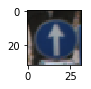

In [18]:
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test the model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

With the LeNet-5 solution from the lecture, we should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Model Architecture

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** 

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** 

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** 

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** 

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [19]:
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1    
n_chan = 3

weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, n_chan, 6], mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal([5*5*16, 120], mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([84, n_classes], mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros([6])),
    'bc2': tf.Variable(tf.zeros([16])),
    'bd1': tf.Variable(tf.zeros([120])),
    'bd2': tf.Variable(tf.zeros([84])),
    'out': tf.Variable(tf.zeros([n_classes]))}

def conv2d(x, W, b, strides=1, padding='VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

In [20]:
def LeNet_with_dropout(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1']) 
    print("Conv1: {}".format(conv1.shape))

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, k=2)
    print("MaxPool1: {}".format(conv1.shape))

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])     
    print("Conv2: {}".format(conv2.shape))

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, k=2)
    print("MaxPool2: {}".format(conv2.shape))

    # Flatten. Input = 5x5x16. Output = 400.
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    print("Flatten: {}".format(fc1.shape))
   
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    print("FC1: {}".format(fc1.shape))
    
    # Activation.        
    fc1 = tf.nn.relu(fc1)
    print("FC1 + ReLU: {}".format(fc1.shape))
    
    # Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    print("FC1 + ReLU + dropout: {}".format(fc1.shape))

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    print("FC2: {}".format(fc2.shape))
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    print("FC2 + ReLU: {}".format(fc2.shape))
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    print("FC2 + ReLU + dropout: {}".format(fc2.shape))

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    print("Logits: {}".format(logits.shape))
    
    return logits


## Features and Labels

Train LeNet to classify [German traffic signs data](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset/) data.

* `x` is a placeholder for a batch of input images
* `y` is a placeholder for a batch of output labels
* `keep_prob` is a placeholder for dropout rate
* `rate` is a placeholder for learning rate

In [21]:
x = tf.placeholder(tf.float32, (None, 32, 32, n_chan))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
rate = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [22]:
# Training and model evaluation pipeline
logits = LeNet_with_dropout(x, keep_prob)
probabilities = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Conv1: (?, 28, 28, 6)
MaxPool1: (?, 14, 14, 6)
Conv2: (?, 10, 10, 16)
MaxPool2: (?, 5, 5, 16)
Flatten: (?, 400)
FC1: (?, 120)
FC1 + ReLU: (?, 120)
FC1 + ReLU + dropout: (?, 120)
FC2: (?, 84)
FC2 + ReLU: (?, 84)
FC2 + ReLU + dropout: (?, 84)
Logits: (?, 43)


In [23]:
def evaluate(X_data, y_data, batch_size, kp, r):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp, rate: r})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def train_and_validate(X_t, y_t, X_v, y_v, num_epochs, batch_size, kp, r):
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_t)

        print("Training...")
        print()
        val_accu = []
        for i in range(num_epochs):
            X_t, y_t = shuffle(X_t, y_t)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_t[offset:end], y_t[offset:end]     
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp, rate: r})

            val_accu.append(evaluate(X_v, y_v, batch_size, kp, r))
            print("EPOCH {} ...".format(i+1))
        print('Training done')
        
        return(val_accu)

In [24]:
# Normalize the data and subtract the mean
X_train_nor = X_train.astype('float32').copy()
X_train_nor /= 255.0
X_train_nor -= 0.5

X_valid_nor = X_valid.astype('float32').copy()
X_valid_nor /= 255.0
X_valid_nor -= 0.5

X_test_nor = X_test.astype('float32').copy()
X_test_nor /= 255.0
X_test_nor -= 0.5

Training...

EPOCH 1 ...
EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
EPOCH 31 ...
EPOCH 32 ...
EPOCH 33 ...
EPOCH 34 ...
EPOCH 35 ...
EPOCH 36 ...
EPOCH 37 ...
EPOCH 38 ...
EPOCH 39 ...
EPOCH 40 ...
EPOCH 41 ...
EPOCH 42 ...
EPOCH 43 ...
EPOCH 44 ...
EPOCH 45 ...
EPOCH 46 ...
EPOCH 47 ...
EPOCH 48 ...
EPOCH 49 ...
EPOCH 50 ...
EPOCH 51 ...
EPOCH 52 ...
EPOCH 53 ...
EPOCH 54 ...
EPOCH 55 ...
EPOCH 56 ...
EPOCH 57 ...
EPOCH 58 ...
EPOCH 59 ...
EPOCH 60 ...
EPOCH 61 ...
EPOCH 62 ...
EPOCH 63 ...
EPOCH 64 ...
EPOCH 65 ...
EPOCH 66 ...
EPOCH 67 ...
EPOCH 68 ...
EPOCH 69 ...
EPOCH 70 ...
EPOCH 71 ...
EPOCH 72 ...
EPOCH 73 ...
EPOCH 74 ...
EPOCH 75 ...
EPOCH 76 ...
EPOCH 77

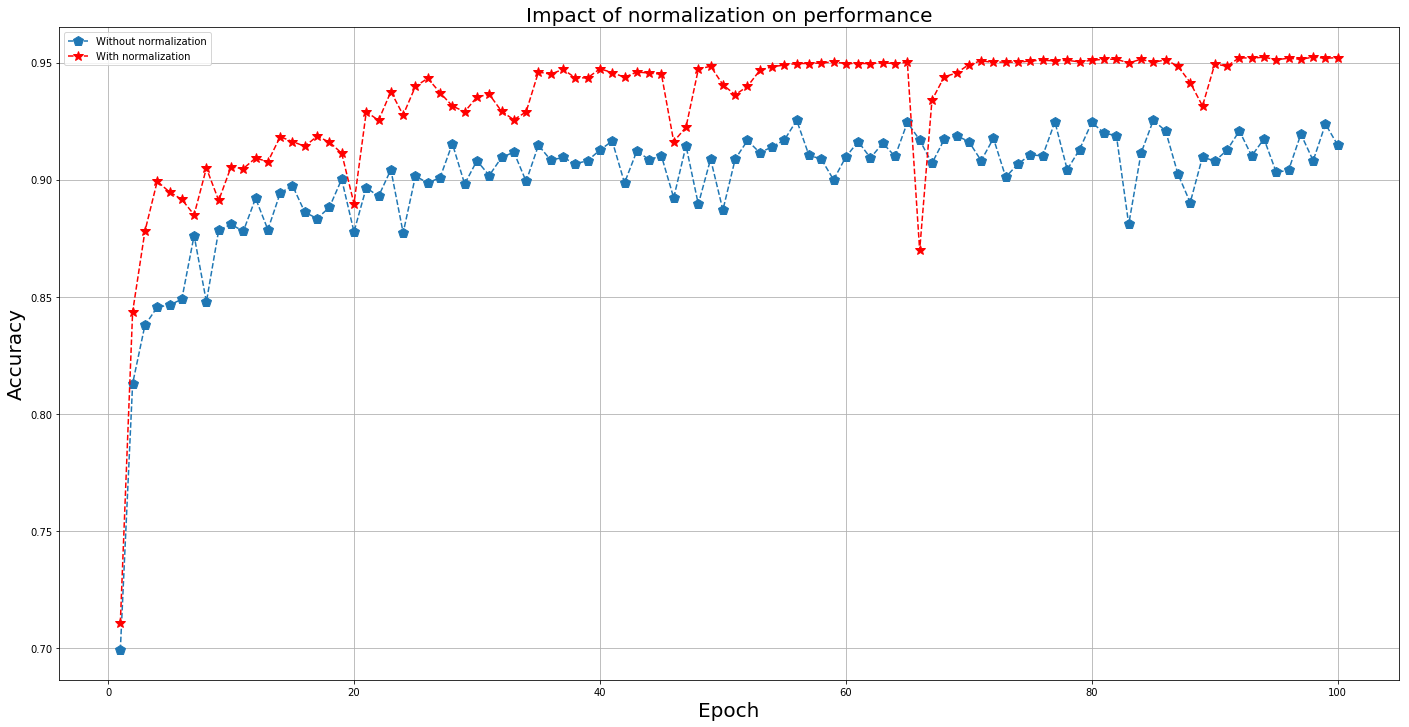

In [9]:
# Impact of normalization on performance
num_epochs = 100
batch_size = 128
kp = 1.0
r = 0.001
val_accu_wo_nor = train_and_validate(X_train, y_train, X_valid, y_valid, num_epochs, batch_size, kp, r)

val_accu_w_nor = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)

plt.figure()
print(val_accu_wo_nor)
plt.plot(range(1, num_epochs+1), val_accu_wo_nor, 'p--', markersize = 10, label='Without normalization')
plt.plot(range(1, num_epochs+1), val_accu_w_nor, 'r*--', markersize = 10, label='With normalization')
plt.title('Impact of normalization on performance', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid()
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'Normalization.png'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

Training...

EPOCH 1 ...
EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
EPOCH 31 ...
EPOCH 32 ...
EPOCH 33 ...
EPOCH 34 ...
EPOCH 35 ...
EPOCH 36 ...
EPOCH 37 ...
EPOCH 38 ...
EPOCH 39 ...
EPOCH 40 ...
EPOCH 41 ...
EPOCH 42 ...
EPOCH 43 ...
EPOCH 44 ...
EPOCH 45 ...
EPOCH 46 ...
EPOCH 47 ...
EPOCH 48 ...
EPOCH 49 ...
EPOCH 50 ...
EPOCH 51 ...
EPOCH 52 ...
EPOCH 53 ...
EPOCH 54 ...
EPOCH 55 ...
EPOCH 56 ...
EPOCH 57 ...
EPOCH 58 ...
EPOCH 59 ...
EPOCH 60 ...
EPOCH 61 ...
EPOCH 62 ...
EPOCH 63 ...
EPOCH 64 ...
EPOCH 65 ...
EPOCH 66 ...
EPOCH 67 ...
EPOCH 68 ...
EPOCH 69 ...
EPOCH 70 ...
EPOCH 71 ...
EPOCH 72 ...
EPOCH 73 ...
EPOCH 74 ...
EPOCH 75 ...
EPOCH 76 ...
EPOCH 77

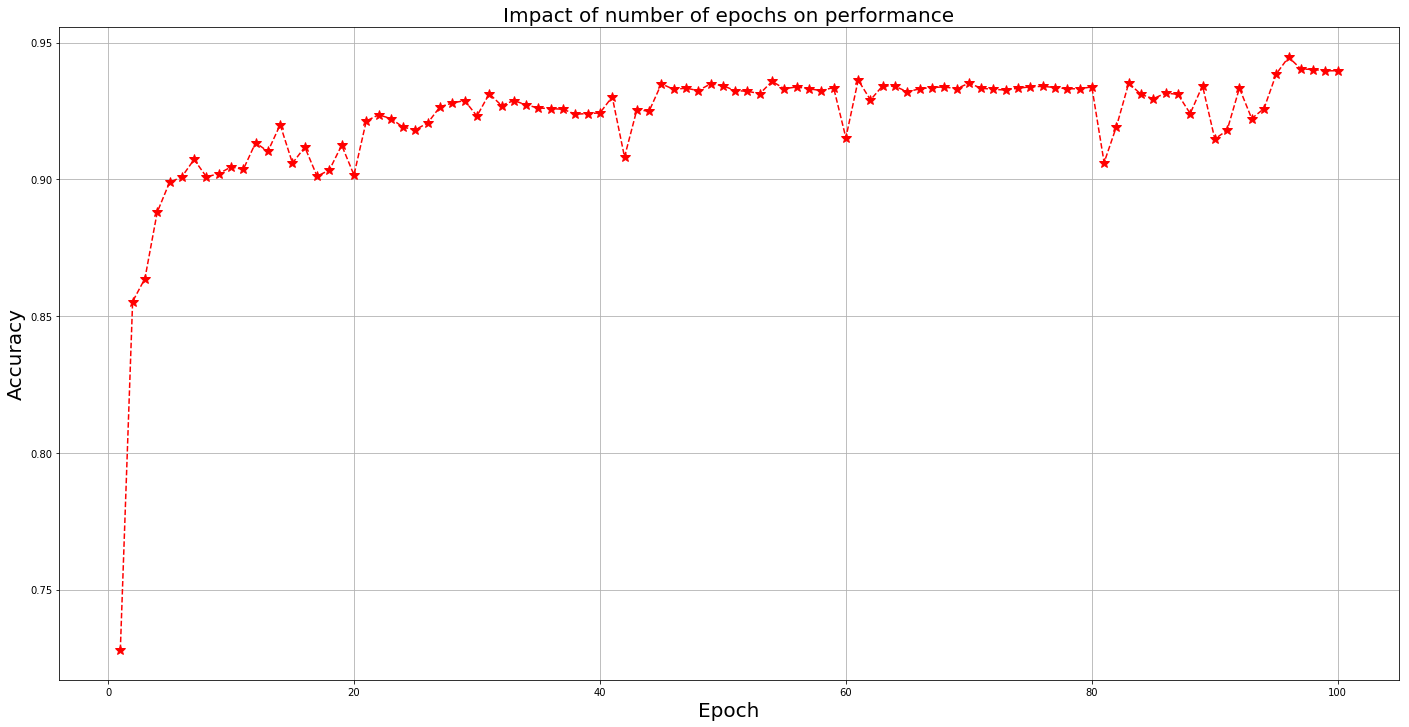

In [10]:
# Impact of number of epochs on performance
batch_size = 128
kp = 1.0
r = 0.001
num_epochs = 100

val_accu = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)
plt.figure()
plt.plot(range(1, num_epochs+1), val_accu, 'r*--', markersize = 10)
plt.title('Impact of number of epochs on performance', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid()    
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'NumEpochs.png'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)


Training...

EPOCH 1 ...
EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
EPOCH 31 ...
EPOCH 32 ...
EPOCH 33 ...
EPOCH 34 ...
EPOCH 35 ...
EPOCH 36 ...
EPOCH 37 ...
EPOCH 38 ...
EPOCH 39 ...
EPOCH 40 ...
EPOCH 41 ...
EPOCH 42 ...
EPOCH 43 ...
EPOCH 44 ...
EPOCH 45 ...
EPOCH 46 ...
EPOCH 47 ...
EPOCH 48 ...
EPOCH 49 ...
EPOCH 50 ...
EPOCH 51 ...
EPOCH 52 ...
EPOCH 53 ...
EPOCH 54 ...
EPOCH 55 ...
EPOCH 56 ...
EPOCH 57 ...
EPOCH 58 ...
EPOCH 59 ...
EPOCH 60 ...
EPOCH 61 ...
EPOCH 62 ...
EPOCH 63 ...
EPOCH 64 ...
EPOCH 65 ...
EPOCH 66 ...
EPOCH 67 ...
EPOCH 68 ...
EPOCH 69 ...
EPOCH 70 ...
EPOCH 71 ...
EPOCH 72 ...
EPOCH 73 ...
EPOCH 74 ...
EPOCH 75 ...
EPOCH 76 ...
EPOCH 77

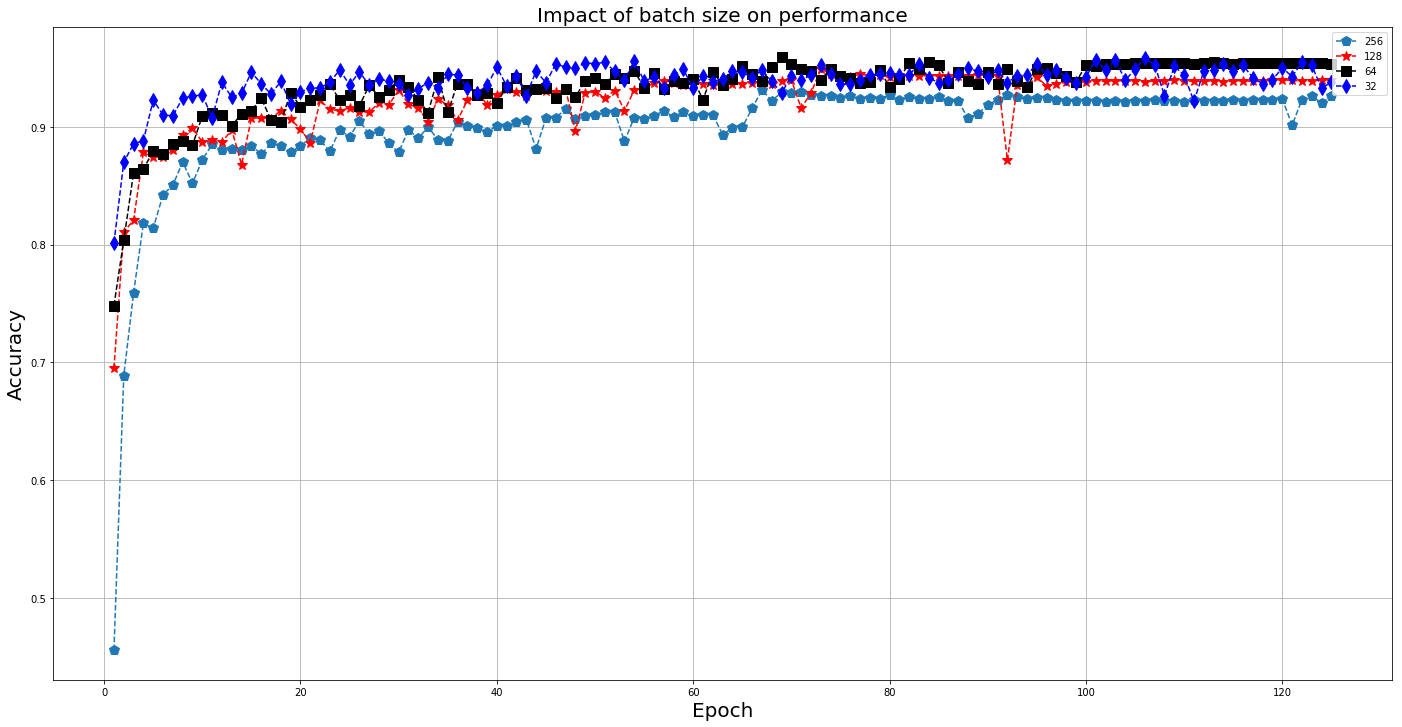

In [11]:
# Impact of batchsize on performance
batches = [256, 128, 64, 32]
kp = 1.0
r = 0.001
num_epochs = 125
c = ['p--', 'r*--', 'ks--', 'bd--']

plt.figure()
for batch_size, c_i in zip(batches, c):

    val_accu = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)    
    
    plt.plot(range(1, num_epochs+1), val_accu, c_i, markersize = 10, label = str(batch_size))
    
plt.title('Impact of batch size on performance', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid()    
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'BatchSize.png'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

Training...

EPOCH 1 ...
EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
EPOCH 31 ...
EPOCH 32 ...
EPOCH 33 ...
EPOCH 34 ...
EPOCH 35 ...
EPOCH 36 ...
EPOCH 37 ...
EPOCH 38 ...
EPOCH 39 ...
EPOCH 40 ...
EPOCH 41 ...
EPOCH 42 ...
EPOCH 43 ...
EPOCH 44 ...
EPOCH 45 ...
EPOCH 46 ...
EPOCH 47 ...
EPOCH 48 ...
EPOCH 49 ...
EPOCH 50 ...
EPOCH 51 ...
EPOCH 52 ...
EPOCH 53 ...
EPOCH 54 ...
EPOCH 55 ...
EPOCH 56 ...
EPOCH 57 ...
EPOCH 58 ...
EPOCH 59 ...
EPOCH 60 ...
EPOCH 61 ...
EPOCH 62 ...
EPOCH 63 ...
EPOCH 64 ...
EPOCH 65 ...
EPOCH 66 ...
EPOCH 67 ...
EPOCH 68 ...
EPOCH 69 ...
EPOCH 70 ...
EPOCH 71 ...
EPOCH 72 ...
EPOCH 73 ...
EPOCH 74 ...
EPOCH 75 ...
EPOCH 76 ...
EPOCH 77

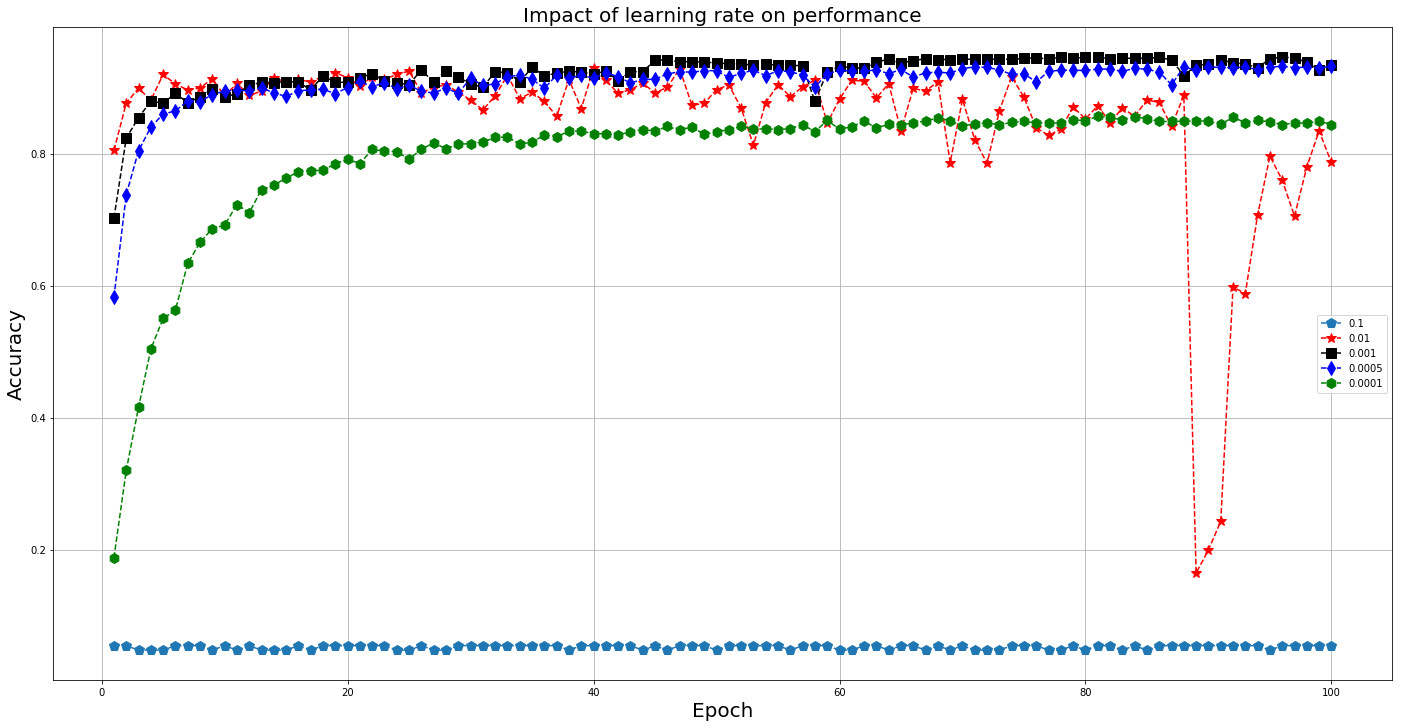

In [12]:
# Impact of learning rate on performance
rs = [0.1, 0.01, 0.001, 0.0005, 0.0001]
kp = 1.0
num_epochs = 100
batch_size = 128
c = ['p--', 'r*--', 'ks--', 'bd--', 'gh--']

plt.figure()
for r, c_i in zip(rs, c):

    val_accu = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)      

    plt.plot(range(1, num_epochs+1), val_accu, c_i, markersize = 10, label = str(r))
    
plt.title('Impact of learning rate on performance', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid() 
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'LearningRate.png'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

Training...

EPOCH 1 ...
EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
EPOCH 31 ...
EPOCH 32 ...
EPOCH 33 ...
EPOCH 34 ...
EPOCH 35 ...
EPOCH 36 ...
EPOCH 37 ...
EPOCH 38 ...
EPOCH 39 ...
EPOCH 40 ...
EPOCH 41 ...
EPOCH 42 ...
EPOCH 43 ...
EPOCH 44 ...
EPOCH 45 ...
EPOCH 46 ...
EPOCH 47 ...
EPOCH 48 ...
EPOCH 49 ...
EPOCH 50 ...
EPOCH 51 ...
EPOCH 52 ...
EPOCH 53 ...
EPOCH 54 ...
EPOCH 55 ...
EPOCH 56 ...
EPOCH 57 ...
EPOCH 58 ...
EPOCH 59 ...
EPOCH 60 ...
EPOCH 61 ...
EPOCH 62 ...
EPOCH 63 ...
EPOCH 64 ...
EPOCH 65 ...
EPOCH 66 ...
EPOCH 67 ...
EPOCH 68 ...
EPOCH 69 ...
EPOCH 70 ...
EPOCH 71 ...
EPOCH 72 ...
EPOCH 73 ...
EPOCH 74 ...
EPOCH 75 ...
EPOCH 76 ...
EPOCH 77

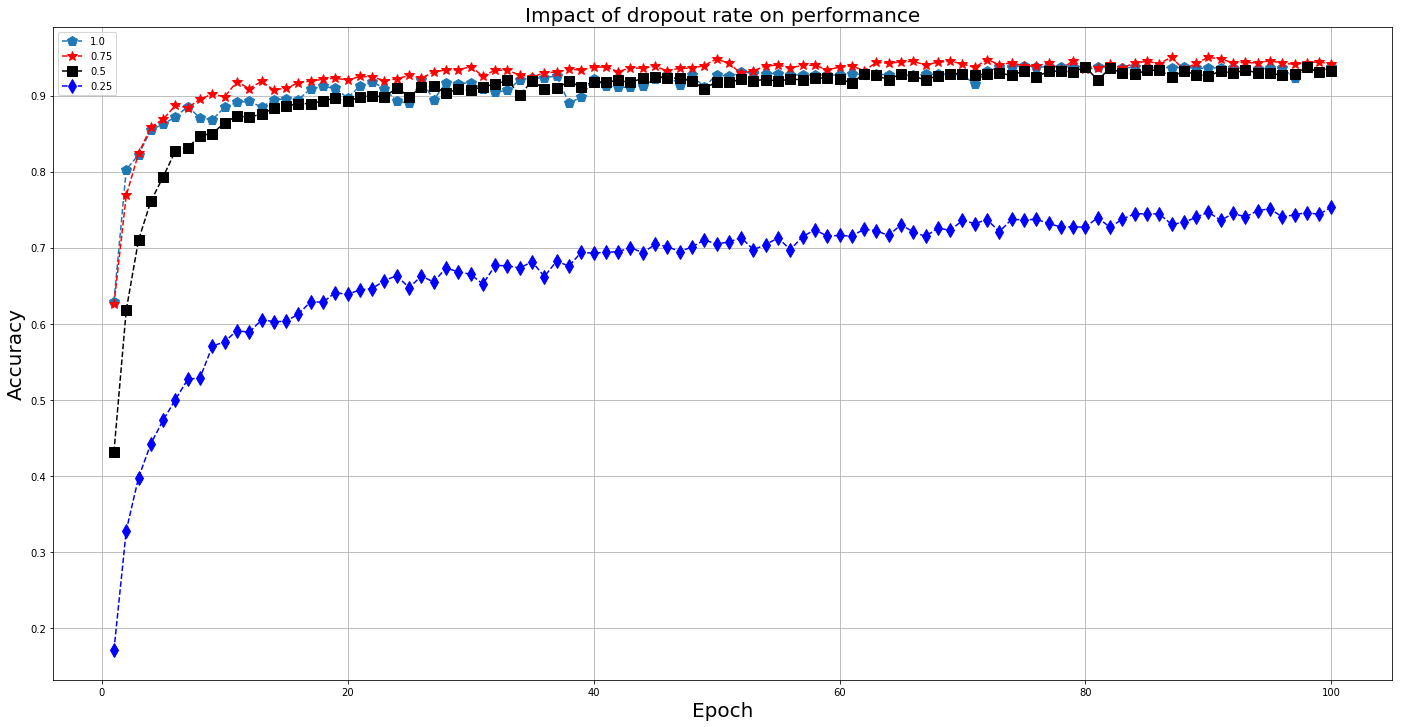

In [13]:
# Impact of dropout rate on performance
r = 0.001
kps = [1.0, 0.75, 0.5, 0.25]
num_epochs = 100
batch_size = 128
c = ['p--', 'r*--', 'ks--', 'bd--']

plt.figure()
for kp, c_i in zip(kps, c):

    val_accu = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)
    
    plt.plot(range(1, num_epochs+1), val_accu, c_i, markersize = 10, label = str(kp))
    
plt.title('Impact of dropout rate on performance', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid() 
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'DropOutRate.png'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

Training...

EPOCH 1 ...
EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
EPOCH 31 ...
EPOCH 32 ...
EPOCH 33 ...
EPOCH 34 ...
EPOCH 35 ...
EPOCH 36 ...
EPOCH 37 ...
EPOCH 38 ...
EPOCH 39 ...
EPOCH 40 ...
EPOCH 41 ...
EPOCH 42 ...
EPOCH 43 ...
EPOCH 44 ...
EPOCH 45 ...
EPOCH 46 ...
EPOCH 47 ...
EPOCH 48 ...
EPOCH 49 ...
EPOCH 50 ...
EPOCH 51 ...
EPOCH 52 ...
EPOCH 53 ...
EPOCH 54 ...
EPOCH 55 ...
EPOCH 56 ...
EPOCH 57 ...
EPOCH 58 ...
EPOCH 59 ...
EPOCH 60 ...
EPOCH 61 ...
EPOCH 62 ...
EPOCH 63 ...
EPOCH 64 ...
EPOCH 65 ...
EPOCH 66 ...
EPOCH 67 ...
EPOCH 68 ...
EPOCH 69 ...
EPOCH 70 ...
EPOCH 71 ...
EPOCH 72 ...
EPOCH 73 ...
EPOCH 74 ...
EPOCH 75 ...
EPOCH 76 ...
EPOCH 77

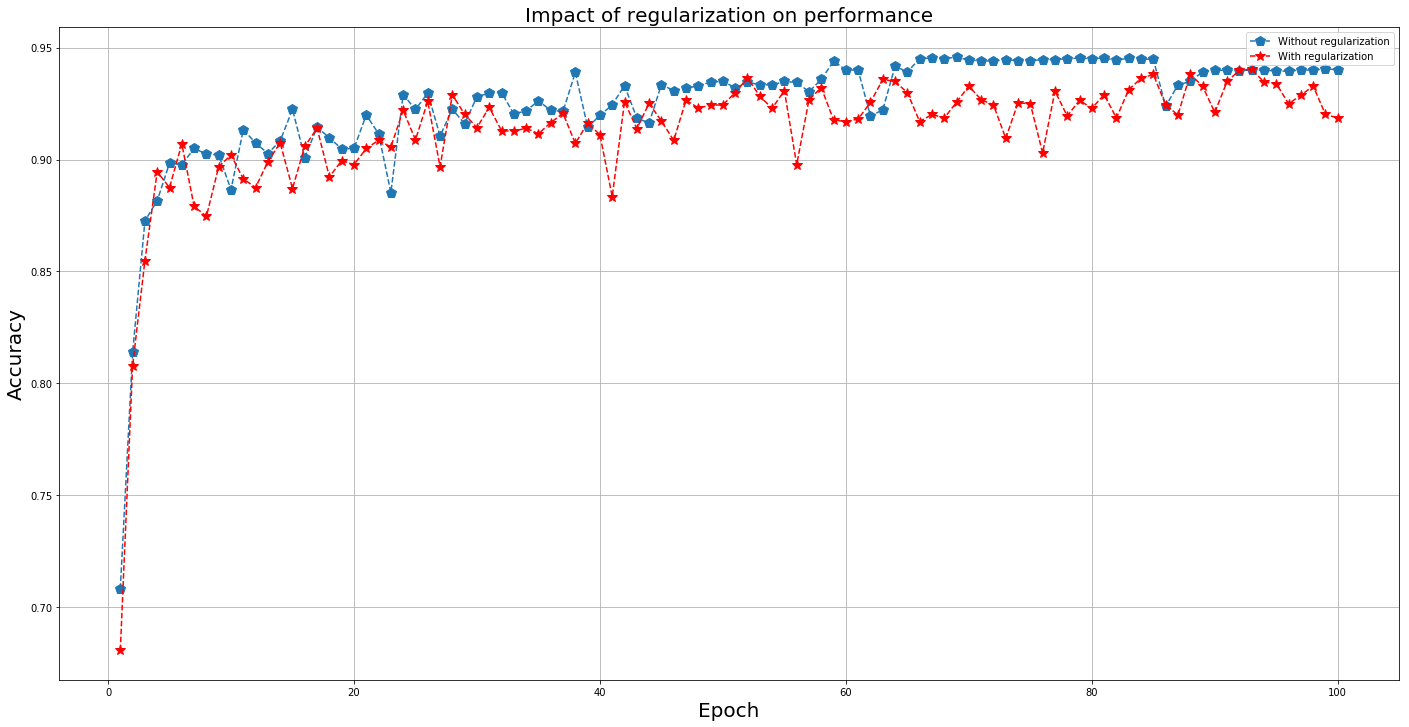

In [14]:
# Impact of weight regularization on performance
r = 0.001
kp = 1.0
num_epochs = 100
batch_size = 128
val_accu_wo_reg = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)

# With weight regularization
beta = 0.01

logits = LeNet_with_dropout(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
regularizers = tf.nn.l2_loss(weights['wd1']) + tf.nn.l2_loss(weights['wd2'])
loss_operation = tf.reduce_mean(loss_operation + beta * regularizers)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

val_accu_w_reg = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)

plt.figure()
plt.plot(range(1, num_epochs+1), val_accu_wo_reg, 'p--', markersize = 10, label='Without regularization')
plt.plot(range(1, num_epochs+1), val_accu_w_reg, 'r*--', markersize = 10, label='With regularization')
plt.title('Impact of regularization on performance', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid()
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'WeightRegularization.png'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)


In [10]:
# Augment the training data
import numpy as np
import tensorflow as tf

def add_salt_pepper_noise(X_imgs, labels):
    # Need to produce a copy as to not modify the original image
    X_imgs_copy = X_imgs.copy()
    row, col, _ = X_imgs_copy[0].shape
    salt_vs_pepper = 0.05
    amount = 0.005
    num_salt = np.ceil(amount * X_imgs_copy[0].size * salt_vs_pepper)
    num_pepper = np.ceil(amount * X_imgs_copy[0].size * (1.0 - salt_vs_pepper))
    for X_img in X_imgs_copy:
        # Add Salt noise
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in X_img.shape]
        X_img[coords[0], coords[1], :] = 1

        # Add Pepper noise
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in X_img.shape]
        X_img[coords[0], coords[1], :] = 0
        
    return X_imgs_copy, labels

X_sp, y_sp = add_salt_pepper_noise(X_train, y_train)

def randomize_color_channel(X_imgs, labels):
    X_imgs_copy = X_imgs.copy()   
    row, col, nchan = X_imgs_copy[0].shape
    altered_imgs = []
    
    for X_img in X_imgs_copy:
        a = X_img[:,:,np.random.permutation(nchan)]
        altered_imgs.append(a)
        
    
    return np.array(altered_imgs), labels

X_cs, y_cs = randomize_color_channel(X_train, y_train)

import cv2

def add_gaussian_noise(X_imgs, labels):
    X_imgs_copy = X_imgs.copy()
    X_imgs_copy = X_imgs_copy.astype(np.float32)
    row, col, ch = X_imgs_copy[0].shape
    gaussian_noise_imgs = []

    # Gaussian distribution parameters
    mean = 0
    var = 1
    sigma = var ** 0.5
    
    for X_img in X_imgs_copy:
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gaussian = gauss.reshape(row,col,ch).astype(np.float32)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype = np.float32)
    
    return gaussian_noise_imgs, labels

X_gs, y_gs = add_gaussian_noise(X_train, y_train)

X_train_aug = np.concatenate((X_train, X_sp, X_gs, X_cs))
y_train_aug = np.concatenate((y_train, y_sp, y_gs, y_cs)).astype('int32')
print(X_train_aug.shape)
print(y_train_aug.shape)

X_train_nor_aug = X_train_aug.astype('float32')
X_train_nor_aug /= 255.0
X_train_nor_aug -= 0.5


(139196, 32, 32, 3)
(139196,)


(139196, 32, 32, 3)
(139196,)
Training...

EPOCH 1 ...
EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
EPOCH 31 ...
EPOCH 32 ...
EPOCH 33 ...
EPOCH 34 ...
EPOCH 35 ...
EPOCH 36 ...
EPOCH 37 ...
EPOCH 38 ...
EPOCH 39 ...
EPOCH 40 ...
EPOCH 41 ...
EPOCH 42 ...
EPOCH 43 ...
EPOCH 44 ...
EPOCH 45 ...
EPOCH 46 ...
EPOCH 47 ...
EPOCH 48 ...
EPOCH 49 ...
EPOCH 50 ...
EPOCH 51 ...
EPOCH 52 ...
EPOCH 53 ...
EPOCH 54 ...
EPOCH 55 ...
EPOCH 56 ...
EPOCH 57 ...
EPOCH 58 ...
EPOCH 59 ...
EPOCH 60 ...
EPOCH 61 ...
EPOCH 62 ...
EPOCH 63 ...
EPOCH 64 ...
EPOCH 65 ...
EPOCH 66 ...
EPOCH 67 ...
EPOCH 68 ...
EPOCH 69 ...
EPOCH 70 ...
EPOCH 71 ...
EPOCH 72 ...
EPOCH 73 ...
EPOCH 74 ...
EPOC

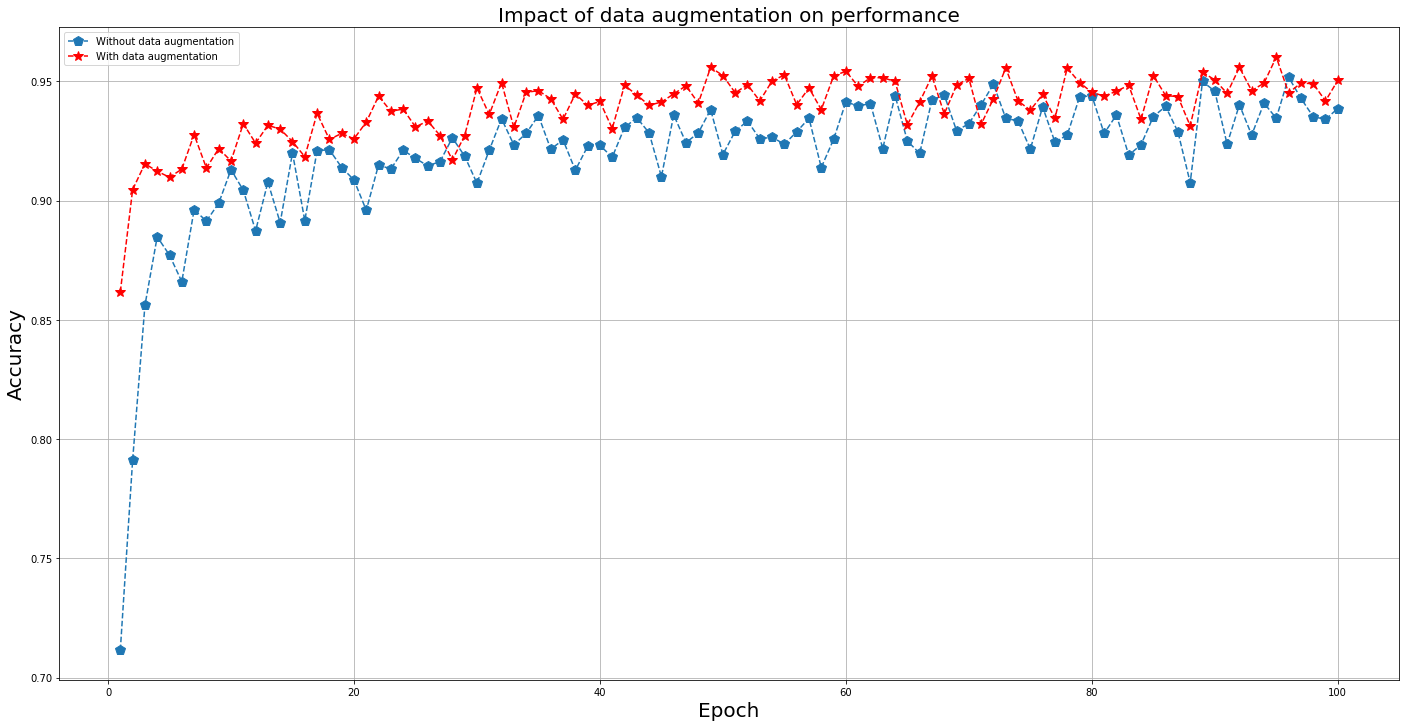

In [15]:
# Impact of data augmentation on performance
logits = LeNet_with_dropout(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

r = 0.001
kp = 1.0
num_epochs = 100
batch_size = 128
val_accu_wo_aug = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)

val_accu_w_aug = train_and_validate(X_train_nor_aug, y_train_aug, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)

plt.figure()
plt.plot(range(1, num_epochs+1), val_accu_wo_aug, 'p--', markersize = 10, label='Without data augmentation')
plt.plot(range(1, num_epochs+1), val_accu_w_aug, 'r*--', markersize = 10, label='With data augmentation')
plt.title('Impact of data augmentation on performance', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid()
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'Augmentation.png'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

In [10]:
# Define deeper architecture
weights_new = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, n_chan, 6], mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma)),
    'wc3': tf.Variable(tf.truncated_normal([3, 3, 16, 32], mean = mu, stddev = sigma)), # additional layer
    'wd1': tf.Variable(tf.truncated_normal([3*3*32, 120], mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([84, n_classes], mean = mu, stddev = sigma))}

biases_new = {
    'bc1': tf.Variable(tf.zeros([6])),
    'bc2': tf.Variable(tf.zeros([16])),
    'bc3': tf.Variable(tf.zeros([32])), # additional layer
    'bd1': tf.Variable(tf.zeros([120])),
    'bd2': tf.Variable(tf.zeros([84])),
    'out': tf.Variable(tf.zeros([n_classes]))}


def LeNet_deep(x, keep_prob):    
    weights = weights_new.copy()
    biases = biases_new.copy()
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1']) 
    print("Conv1: {}".format(conv1.shape))

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, k=2)
    print("MaxPool1: {}".format(conv1.shape))

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])     
    print("Conv2: {}".format(conv2.shape))

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, k=2)
    print("MaxPool2: {}".format(conv2.shape))
    
    # Layer 2: Convolutional. Output = 3x3x32.
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])     
    print("Conv3: {}".format(conv3.shape))    

    # Flatten. Input = 3x3x32. Output = 288.
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    print("Flatten: {}".format(fc1.shape))
   
    # Layer 3: Fully Connected. Input = 288. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    print("FC1: {}".format(fc1.shape))
    
    # Activation.        
    fc1 = tf.nn.relu(fc1)
    print("FC1 + ReLU: {}".format(fc1.shape))
    
    # Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    print("FC1 + ReLU + dropout: {}".format(fc1.shape))

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    print("FC2: {}".format(fc2.shape))
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    print("FC2 + ReLU: {}".format(fc2.shape))
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    print("FC2 + ReLU + dropout: {}".format(fc2.shape))

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    print("Logits: {}".format(logits.shape))
    
    return logits

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
Training...

EPOCH 1 ...
EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
EPOCH 31 ...
EPOCH 32 ...
EPOCH 33 ...
EPOCH 34 ...
EPOCH 35 ...
EPOCH 36 ...
EPOCH 37 ...
EPOCH 38 ...
EPOCH 39 ...
EPOCH 40 ...
EPOCH 41 ...
EPOCH 42 ...
EPOCH 43 ...
EPOCH 44 ...
EPOCH 45 ...
EPOCH 46 ...
EPOCH 47 ...
EPOCH 48 ...
EPOCH 49 ...
EPOCH 50 ...
EPOCH 51 ...
EPOCH 52 ...
EPOCH 53 ...
EPOCH 54 ...
EPOCH 55 ...
EPOCH 56 ...
EPOCH 57 ...
EPOCH 58 ...
EPOCH 59 ...
EPOCH 60 ...
EPOCH 61 ...
EPOCH 62 ...
EPOCH 63 ...
EPOCH 64 ...
EPOCH 65 ...
EPOCH 66 ...
EPOCH 67 ...
EPOCH 68 ...
EPOCH 69 ...
EPOCH 70 ...
EPOCH 71 ...
EPOCH 72 ...
EPOCH 

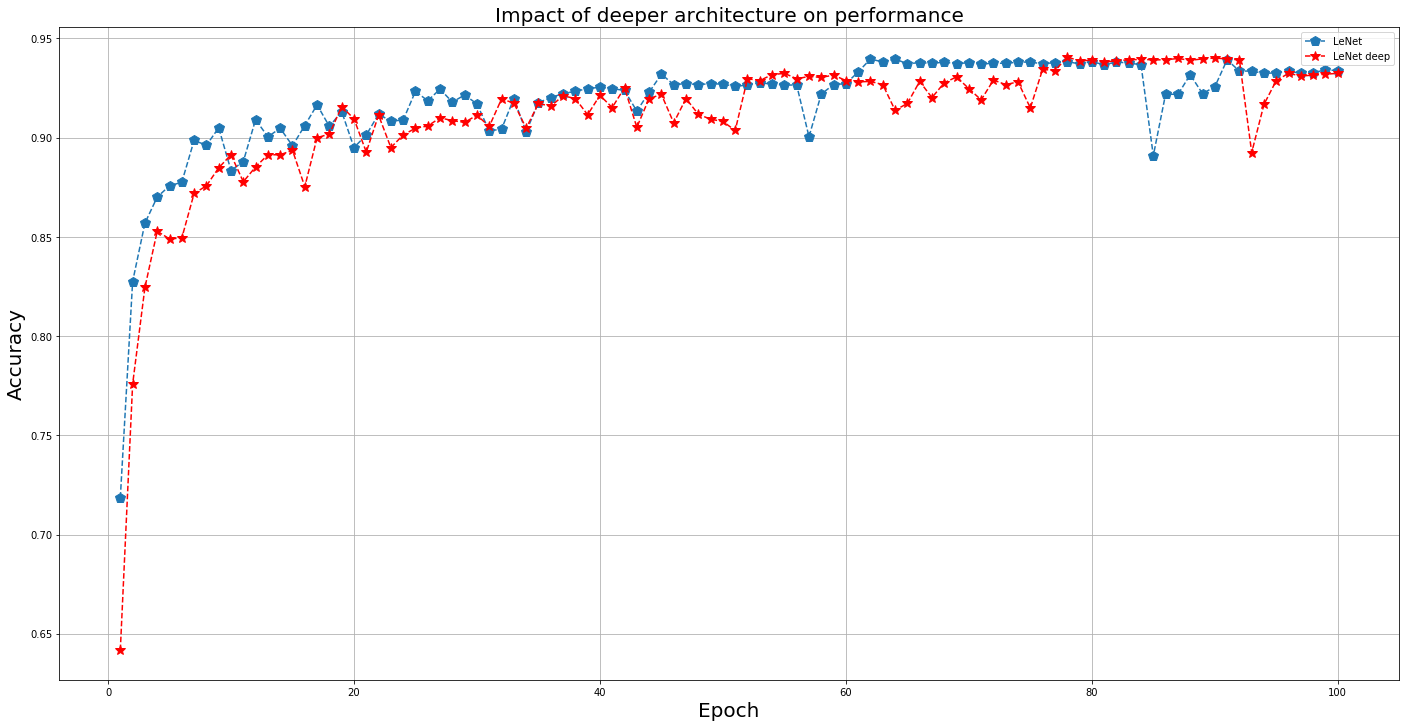

In [12]:
# Impact of deeper architecture on performance
num_epochs = 100
batch_size = 128
kp = 1.0
r = 0.001
print(X_train_nor.shape)
print(y_train.shape)
print(X_valid_nor.shape)
print(y_valid.shape)

val_accu_lenet = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)

logits = LeNet_deep(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
val_accu_lenet_deep = train_and_validate(X_train_nor, y_train, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)

plt.figure()
plt.plot(range(1, num_epochs+1), val_accu_lenet, 'p--', markersize = 10, label='LeNet')
plt.plot(range(1, num_epochs+1), val_accu_lenet_deep, 'r*--', markersize = 10, label='LeNet deep')
plt.title('Impact of deeper architecture on performance', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid()
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(24,12)
sFile = 'Architecture.png'
plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
r = 0.0005
kp = 0.75
num_epochs = 100
batch_size = 64

beta = 0.01

logits = LeNet_with_dropout(x, keep_prob)
probabilities = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def train_and_validate(X_t, y_t, X_v, y_v, num_epochs, batch_size, kp, r):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_t)

        print("Training...")
        print()
        for i in range(num_epochs):
            X_t, y_t = shuffle(X_t, y_t)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_t[offset:end], y_t[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp, rate: r})

            val_accu = evaluate(X_v, y_v, batch_size, kp, r)
            print()
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(val_accu))
            print()
            
        save_path = saver.save(sess, "./lenet_model.ckpt")
        print("Model saved in path: %s" % save_path)
        
val_accu = train_and_validate(X_train_nor_aug, y_train_aug, X_valid_nor, y_valid, num_epochs, batch_size, kp, r)
   

Conv1: (?, 28, 28, 6)
MaxPool1: (?, 14, 14, 6)
Conv2: (?, 10, 10, 16)
MaxPool2: (?, 5, 5, 16)
Flatten: (?, 400)
FC1: (?, 120)
FC1 + ReLU: (?, 120)
FC1 + ReLU + dropout: (?, 120)
FC2: (?, 84)
FC2 + ReLU: (?, 84)
FC2 + ReLU + dropout: (?, 84)
Logits: (?, 43)
Training...


EPOCH 1 ...
Validation Accuracy = 0.796


EPOCH 2 ...
Validation Accuracy = 0.866


EPOCH 3 ...
Validation Accuracy = 0.885


EPOCH 4 ...
Validation Accuracy = 0.893


EPOCH 5 ...
Validation Accuracy = 0.894


EPOCH 6 ...
Validation Accuracy = 0.912


EPOCH 7 ...
Validation Accuracy = 0.881


EPOCH 8 ...
Validation Accuracy = 0.911


EPOCH 9 ...
Validation Accuracy = 0.927


EPOCH 10 ...
Validation Accuracy = 0.920


EPOCH 11 ...
Validation Accuracy = 0.914


EPOCH 12 ...
Validation Accuracy = 0.921


EPOCH 13 ...
Validation Accuracy = 0.925


EPOCH 14 ...
Validation Accuracy = 0.918


EPOCH 15 ...
Validation Accuracy = 0.926


EPOCH 16 ...
Validation Accuracy = 0.924


EPOCH 17 ...
Validation Accuracy = 0.929


EPOCH 1

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_nor, y_test, batch_size, 1.0, r)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from .\lenet_model.ckpt
Test Accuracy = 0.943


In [49]:
def predict_output(data, kp):
    sess = tf.get_default_session()
    probs = sess.run(probabilities, feed_dict={x:data, keep_prob:kp})
    y_pred = sess.run(tf.argmax(probs, 1))
    return y_pred 

kp = 1.0
r = 0.0005

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./lenet_model.ckpt")
    y_pred = predict_output(X_test_nor, kp) # predicted class for test data
    
import pandas as pd
sign_info = pd.read_csv(os.path.join(base_path, 'signnames.csv'), index_col=False)
labels = sign_info.SignName

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

INFO:tensorflow:Restoring parameters from ./lenet_model.ckpt
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.88      1.00      0.94        60
                              Speed limit (30km/h)       0.89      0.99      0.94       720
                              Speed limit (50km/h)       0.96      0.98      0.97       750
                              Speed limit (60km/h)       0.97      0.93      0.95       450
                              Speed limit (70km/h)       0.99      0.95      0.97       660
                              Speed limit (80km/h)       0.92      0.90      0.91       630
                       End of speed limit (80km/h)       0.99      0.84      0.91       150
                             Speed limit (100km/h)       0.95      0.87      0.91       450
                             Speed limit (120km/h)       0.86      1.00      0.92       450
                  

---

## Step 3: Test a Model on New Images

To get more insight into how the model is working, download at least five pictures of German traffic signs from the web and use the model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

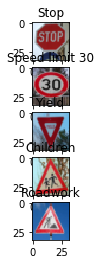

In [11]:
import tensorflow as tf
import numpy as np
def im_resize(filename):
    
    from PIL import Image
    im = Image.open(filename)
    image = im.resize((32, 32), Image.BILINEAR)
    image = np.array(image)
    
    return image

test_dir = os.path.join(base_path, 'test_pics')
image_1 = im_resize(os.path.join(test_dir, 'stop.jpg'))
image_2 = im_resize(os.path.join(test_dir, 'speed_limit_30.jpg'))
image_3 = im_resize(os.path.join(test_dir, 'yield.jpg'))
image_4 = im_resize(os.path.join(test_dir, 'children.jpg'))
image_5 = im_resize(os.path.join(test_dir, 'roadwork.jpg'))

plt.figure()
plt.subplot(5,1,1); plt.imshow(image_1); plt.title('Stop')
plt.subplot(5,1,2); plt.imshow(image_2); plt.title('Speed limit 30')
plt.subplot(5,1,3); plt.imshow(image_3); plt.title('Yield')
plt.subplot(5,1,4); plt.imshow(image_4); plt.title('Children')
plt.subplot(5,1,5); plt.imshow(image_5); plt.title('Roadwork')

plt.show()

In [12]:
# Preprocess new data
X_new = np.concatenate((image_1[None, :], image_2[None, :], image_3[None, :], image_4[None, :], image_5[None,:]))
y_new = np.array([14, 1, 13, 28, 25]).astype('int32')
print(X_new.shape)
print(y_new.shape)

X_new_nor = X_new.astype('float32').copy()
X_new_nor /= 255.0
X_new_nor -= 0.5

(5, 32, 32, 3)
(5,)


In [25]:
def predict_softmax(data, kp):
    sess = tf.get_default_session()
    probs = sess.run(probabilities, feed_dict={x:data, keep_prob:kp})
    probs_top_5 = sess.run(tf.nn.top_k(tf.constant(probs), k=5))
    probs_top = sess.run(tf.nn.top_k(tf.constant(probs), k=1))
    pred_class = probs_top[1]
    return probs_top_5, pred_class

def predict_accuracy(data, labels, kp, r):
    sess = tf.get_default_session()
    accuracy = sess.run(accuracy_operation, feed_dict={x:data, y:labels, keep_prob:kp, rate:r})
    return accuracy

kp = 1.0
r = 0.0005

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./lenet_model.ckpt")
    probs_top_5, pred_class = predict_softmax(X_new_nor, kp) # top 5 softmax probabilities
    accuracy = predict_accuracy(X_new_nor, y_new, kp, r) # overall accuracy
    
print(probs_top_5)
print(pred_class)
print(accuracy)

INFO:tensorflow:Restoring parameters from ./lenet_model.ckpt
TopKV2(values=array([[3.21097702e-01, 2.63605475e-01, 1.16672575e-01, 1.02589555e-01,
        5.94826974e-02],
       [9.99999404e-01, 6.50505285e-07, 5.30590016e-10, 6.43616063e-11,
        5.93527796e-11],
       [9.98842597e-01, 8.43859510e-04, 1.50688007e-04, 6.95693016e-05,
        3.06095717e-05],
       [9.99999404e-01, 4.89154786e-07, 5.78754289e-08, 5.63097416e-11,
        4.62080114e-12],
       [9.82835352e-01, 1.21317673e-02, 1.58712501e-03, 1.48450758e-03,
        1.39650889e-03]], dtype=float32), indices=array([[14,  9, 33, 34, 17],
       [ 1,  2, 38, 12, 40],
       [13, 11, 30, 41, 28],
       [28, 11, 27, 29, 18],
       [25, 26, 29, 24, 22]]))
[[14]
 [ 1]
 [13]
 [28]
 [25]]
1.0


In [14]:
import pandas as pd
sign_info = pd.read_csv(os.path.join(base_path, 'signnames.csv'), index_col=False)
print(sign_info)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

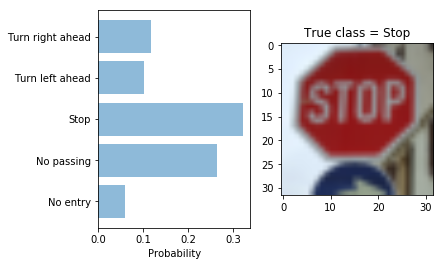

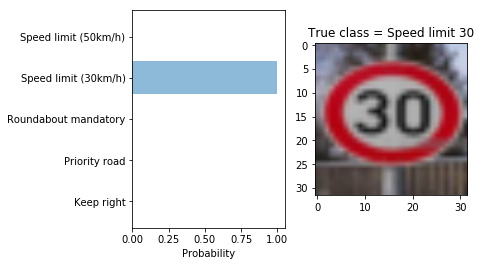

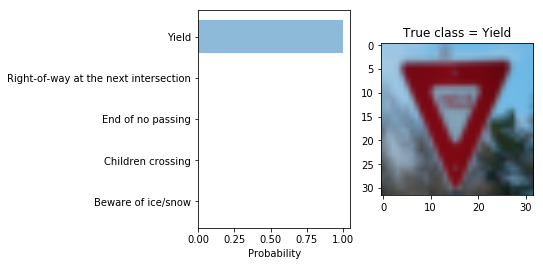

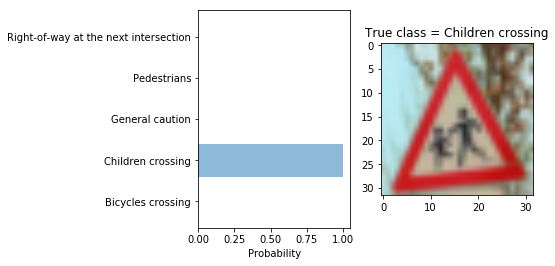

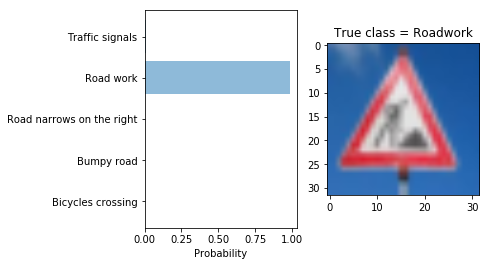

In [26]:
True_class = ['Stop', 'Speed limit 30', 'Yield', 'Children crossing', 'Roadwork']
top_5_prob = probs_top_5[0]
top_5_classes = probs_top_5[1]

for i, TC in enumerate(True_class):        
    sign = sign_info.SignName[top_5_classes[i]]
    prob = top_5_prob[i]

    plt.figure()
    plt.subplot(1,2,1)    
    plt.barh(sign, prob, align='center', alpha=0.5)
    plt.xlabel('Probability')
    plt.subplot(1,2,2)
    plt.imshow(X_new[i], interpolation='bilinear')
    plt.title('True class = ' + TC)
    sFile = 'New_data_result' + str(i) + '.png'
    plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This section helps in understanding the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network we can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided below is the function code that allows to get the visualization output of any tensorflow weight layer we want. The inputs to the function should be a stimuli image, one used during training or a new one we provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if we wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer we could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that our trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="figures/visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


## ** Visualize network's feature maps ** ##

In [115]:
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1, sFile=''):
    # Here make sure to preprocess the image_input in a way the network expects
    # with size, normalization, etc. if needed
    # image_input =
    # Note: x should be the same name as the network's tensorflow data placeholder variable
    # If we get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x: image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
     
    plt.savefig(sFile, bbox_inches='tight', orientation='landscape', dpi=100)

In [ ]:
# Preprocess new data
X_new = image[None, :]
X_new_nor = X_new.astype('float32').copy()
X_new_nor /= 255.0
X_new_nor -= 0.5

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputFeatureMap(X_new_nor[None,0], conv1, sFile='Visualization_conv1.jpg')
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputFeatureMap(X_new_nor[None,0], pool1, sFile='Visualization_pool1.jpg')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputFeatureMap(X_new_nor[None,0], conv2, sFile='Visualization_conv2.jpg')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputFeatureMap(X_new_nor[None,0], pool2, sFile='Visualization_pool2.jpg')    
    